In [1]:
import pandas as pd
import numpy as np
import itertools
import nltk
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Fake news detection on politics articles with basic ML algorithms
It's baseline and starting point.
For every algorithm created copy of dataframe for easely working with, testing and hyperparamers tuning if needed.

Five alrogithms will be tested here with cleaned and filtered dataset, in the end you can look at conclusion table.

Algorithms list: Passive Aggressive Classifier, Naive Bayes, Logistic Regression, Random Forest, XGBoost.

In [83]:
#Read the data, get shape and head
PATH = 'C:/Users/User/nlp/fake-news-baselines/'
df=pd.read_csv(PATH +'/news.csv')

print(df.shape)
df.head()

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
df['label'] = df['label'].map({'FAKE': 1, 'REAL': 0})
labels = df['label']

# TFIDF with Passive Aggressive Classifier

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [5]:
#Initialize TFIDF vectorizer
tfidf_vectorizer=TfidfVectorizer(max_df=0.7)

tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [6]:
#Initialize a PassiveAggressiveClassifier and fit then on TFIDF
pac_cl = PassiveAggressiveClassifier(max_iter=50, random_state=17)
pac_cl.fit(tfidf_train,y_train)

#Predict on the test set and calculate accuracy
y_pred = pac_cl.predict(tfidf_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.82%


# Cleaned TFIDF with Passive Aggressive Classifier and stopwords

In [7]:
#Importing functions for data cleaning
from cleaner import *

In [8]:
#Making copy of dataset 
df1 = df.copy()

In [9]:
#Clean text and filtering some trash symbols
df1 = clean_column(df1, 'text', 'clean_text')
filtration(df1, 'clean_text')

In [10]:
df1.head()

,Unnamed: 0,title,text,label,clean_text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1,daniel greenfield shillman journalism fellow f...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,google pinterest digg linkedin reddit stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0,us secretary state john f kerry said monday st...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1,kaydee king @kaydeeking november 9 2016 lesson...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0,primary day new york front runners hillary cli...


In [13]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(df1['clean_text'], labels, test_size=0.2, random_state=17)

In [14]:
#Initialize TFIDF vectorizer with english stop words and maximum document frequency of 0.7
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

tfidf_train1 = tfidf_vectorizer.fit_transform(x_train1) 
tfidf_test1 = tfidf_vectorizer.transform(x_test1)

In [75]:
#Initialize a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50, random_state=17)

In [76]:
%%time
pac.fit(tfidf_train1 ,y_train1)
y_pred1 = pac.predict(tfidf_test1)

Wall time: 103 ms


In [79]:
score = accuracy_score(y_test1, y_pred1)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.45%


# Naive Bayes

In [17]:
#Making copy of already cleared dataset
df2 = df1.copy()

In [18]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(df2['clean_text'], labels, test_size=0.2, random_state=17)

In [19]:
#Initialize TFIDF vectorizer with english stop words and maximum document frequency of 0.7
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df= 0.7)

tfidf_train2 = tfidf_vectorizer.fit_transform(x_train2)

In [72]:
nb = MultinomialNB()

In [73]:
%%time
nb.fit(tfidf_train2, y_train2)
y_pred2 = nb.predict(tfidf_train2)

Wall time: 312 ms


In [74]:
#Calculate accuracy and F1 score
print('F1 score {:.4}%'.format(f1_score(y_train2, y_pred2, average='macro', labels=np.unique(y_pred2))*100 ))
print('Accuracy score {:.4}%'.format(accuracy_score(y_train2, y_pred2)*100))

F1 score 95.2%
Accuracy score 95.21%


# Logistic Regression Classifier

In [26]:
#Making copy of already cleared dataset
df3 = df1.copy()

In [27]:
#Initialize TFIDF vectorizer with english stop words
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df= 0.85, min_df= 0.01)

tfidf_train3 = tfidf_vectorizer.fit_transform(df3['clean_text'])

In [28]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(tfidf_train3, labels, test_size=0.2, random_state=17)

In [49]:
lr = LogisticRegression(solver='saga', penalty='l1', random_state=17)

In [63]:
%%time
lr.fit(x_train3, y_train3)
y_pred3 = lr.predict(x_test3)

Wall time: 3.7 s


In [64]:
#Calculate accuracy and F1 score
print('F1 score {:.4}%'.format(f1_score(y_test3, y_pred3, average='macro')*100 ))
print('Accuracy score {:.4}%'.format(accuracy_score(y_test3, y_pred3)*100))

F1 score 90.13%
Accuracy score 90.13%


# Random Forest Classifier

In [38]:
#Making copy of already cleared dataset
df4 = df1.copy()

In [39]:
#Initialize TFIDF vectorizer with english stop words
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df= 0.85, min_df= 0.01)

tfidf_train4 = tfidf_vectorizer.fit_transform(df4['clean_text'])

In [40]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(tfidf_train4, labels, test_size=0.2, random_state=17)

In [58]:
rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)

In [59]:
%%time
rfc.fit(x_train4, y_train4)
y_pred4 = rfc.predict(x_test4)

Wall time: 2.05 s


In [60]:
#Calculate accuracy and F1 score
print('F1 score {:.4}%'.format(f1_score(y_test4, y_pred4, average='macro')*100 ))
print('Accuracy score {:.4}%'.format(accuracy_score(y_test4, y_pred4)*100))

F1 score 89.97%
Accuracy score 89.98%


# XGBoost Classifier

In [65]:
#Making copy of already cleared dataset
df5 = df1.copy()

In [67]:
#Initialize TFIDF vectorizer with english stop words
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df= 0.85, min_df= 0.01)

tfidf_train5 = tfidf_vectorizer.fit_transform(df5['clean_text'])

In [68]:
x_train5, x_test5, y_train5, y_test5 = train_test_split(tfidf_train5, labels, test_size=0.2, random_state=17)

In [69]:
xgb = XGBClassifier(random_state=17)

In [70]:
%%time
xgb.fit(x_train5, y_train5)
y_pred5 = xgb.predict(x_test5)

Wall time: 30.4 s


In [71]:
#Calculate accuracy and F1 score
print('F1 score {:.4}%'.format(f1_score(y_test5, y_pred5, average='macro')*100 ))
print('Accuracy score {:.4}%'.format(accuracy_score(y_test5, y_pred5)*100))

F1 score 88.87%
Accuracy score 88.87%


# Conclusion about basic algorithms accuracy and training time

| Algorithm accuracy | Training time |
|--------------------|---------------|
|Passive Aggressive Classifier: 93.45% | 103ms |
|Naive Bayes: 95.21% | 312ms |
|Logistic Regression: 90.13% | 3.7s |
|Random Forest: 89.98% | 2.05s |
|XGBoost: 88.87% | 30.4s |

# Most common words in fake news

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [112]:
fake_words = nltk.word_tokenize(" ".join(df1['clean_text'][df['label'] == 1].values.tolist()))

In [113]:
#list of most common words in fake news
fake_words_counter = Counter(fake_words)
print(fake_words_counter.most_common(30))

[('``', 15604), ("''", 15204), ('us', 7157), ('trump', 5944), ('clinton', 5811), ('?', 5539), ('people', 5255), ('one', 5104), ('would', 4903), ('hillary', 4213), ('said', 3996), ('new', 3502), ('like', 3307), ('also', 3186), ('election', 3065), ('time', 3017), ('world', 2958), ('even', 2899), ('state', 2866), ('government', 2715), ('2016', 2652), ('president', 2632), ('many', 2589), ('american', 2513), ('war', 2502), ('could', 2492), ('states', 2363), ("'s", 2308), ('its', 2300), ('years', 2274)]


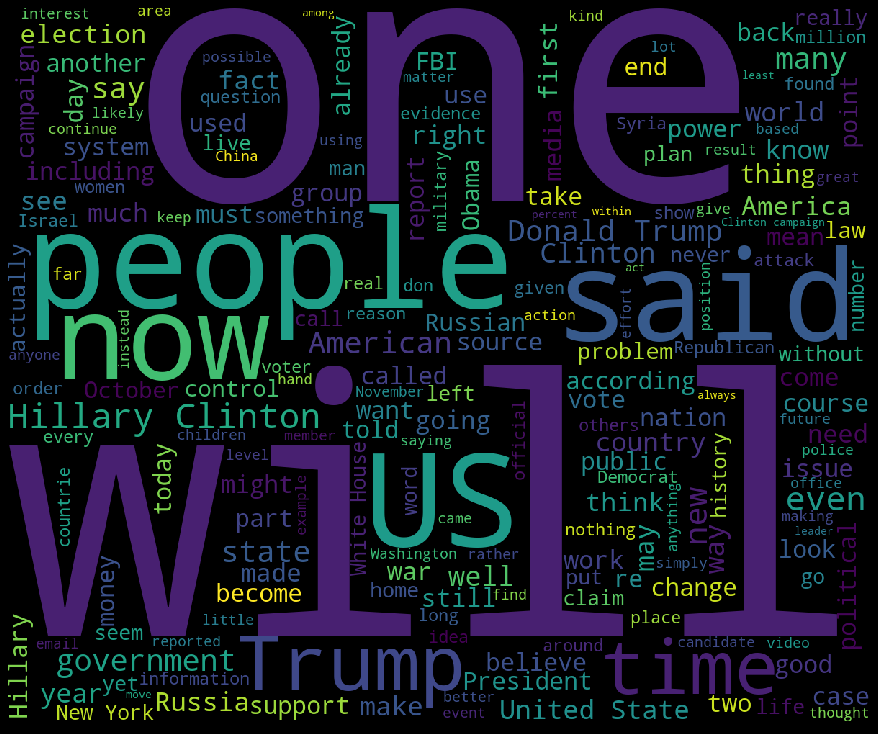

In [117]:
fake_wordcloud = WordCloud(width=1200, height=1000, random_state = 17).generate(" ".join(fake_words))

fig = plt.figure(figsize=(20,10), facecolor = 'k')
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()